In [1]:
import numpy as np
import itertools
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append("../code/")
from dataloader import get_train_test
import pandas as pd

In [114]:
# fold_num = 0
dataset = 1

In [115]:
# load best parameters for rnn-individual and rnn-tree
best_rnn_individual = np.load("../code/baseline/result/rnn-individual-param-{}.npy".format(dataset)).item()
best_rnn_tree = np.load("../code/baseline/result/rnn-tree-param-{}.npy".format(dataset)).item()

In [116]:
# cnn-individual&cnn-tree best parameters
best_cnn_individual = np.load("../code/baseline/result/cnn-individual-param-{}.npy".format(dataset)).item()
best_cnn_tree = np.load("../code/baseline/result/cnn-tree-param-{}.npy".format(dataset)).item()

In [117]:
best_rnn_individual

{'dr': {0: {'bidirectional': True,
   'cell_type': 'GRU',
   'hidden_size': 100,
   'iters': 1000,
   'lr': 0.1,
   'num_layers': 1},
  1: {'bidirectional': True,
   'cell_type': 'GRU',
   'hidden_size': 50,
   'iters': 1000,
   'lr': 0.01,
   'num_layers': 2},
  2: {'bidirectional': True,
   'cell_type': 'LSTM',
   'hidden_size': 100,
   'iters': 3000,
   'lr': 0.01,
   'num_layers': 2},
  3: {'bidirectional': True,
   'cell_type': 'GRU',
   'hidden_size': 20,
   'iters': 1000,
   'lr': 0.01,
   'num_layers': 1},
  4: {'bidirectional': True,
   'cell_type': 'GRU',
   'hidden_size': 20,
   'iters': 1000,
   'lr': 0.1,
   'num_layers': 1}},
 'dw': {0: {'bidirectional': True,
   'cell_type': 'GRU',
   'hidden_size': 20,
   'iters': 1000,
   'lr': 0.1,
   'num_layers': 1},
  1: {'bidirectional': True,
   'cell_type': 'GRU',
   'hidden_size': 20,
   'iters': 1000,
   'lr': 0.01,
   'num_layers': 1},
  2: {'bidirectional': True,
   'cell_type': 'GRU',
   'hidden_size': 20,
   'iters': 3000,

In [88]:
# get prediction for rnn individual
rnn_individual_pred = {}
rnn_individual_error = {}
for fold_num in range(5):
    rnn_individual_pred[fold_num] = {}
    rnn_individual_error[fold_num] = {}
    for appliance in ['hvac', 'fridge', 'dr', 'dw', 'mw']:
        cell_type = best_rnn_individual[appliance][fold_num]['cell_type']
        hidden_size = best_rnn_individual[appliance][fold_num]['hidden_size']
        num_layers = best_rnn_individual[appliance][fold_num]['num_layers']
        lr = best_rnn_individual[appliance][fold_num]['lr']
        iters = best_rnn_individual[appliance][fold_num]['iters']
        bidirectional = best_rnn_individual[appliance][fold_num]['bidirectional']

        directory = "../code/baseline/rnn-tree/{}/{}/{}/{}/{}/{}/{}/3000/0.0/".format(dataset, fold_num, cell_type,
                                                                                                    hidden_size,
                                                                                                    num_layers,
                                                                                                    bidirectional,
                                                                                                    lr)
        filename = "test-pred-{}-{}-{}-{}-{}-{}-{}-3000-0.0-[\'{}\'].npy".format(fold_num, dataset, cell_type, hidden_size, num_layers,
                                                                                 bidirectional, lr, appliance)

        full_path = directory + filename
        rnn_individual_pred[fold_num][appliance] = np.asarray(np.load(full_path).item()[iters]).reshape(-1, 1, 112, 24)
        filename = "test-error-{}-{}-{}-{}-{}-{}-{}-3000-0.0-[\'{}\'].npy".format(fold_num, dataset, cell_type, hidden_size, num_layers,
                                                                                 bidirectional, lr, appliance)
        full_path = directory + filename
        rnn_individual_error[fold_num][appliance] = np.load(full_path).item()[iters][appliance]
    

In [89]:
# get prediction for rnn tree
rnn_tree_pred = {}
rnn_tree_error = {}
for fold_num in range(5):
    # get prediction for rnn tree
    rnn_tree_pred[fold_num] = {}
#     rnn_tree_error[fold_num] = {}
    cell_type = best_rnn_tree[fold_num]['cell_type']
    hidden_size = best_rnn_tree[fold_num]['hidden_size']
    num_layers = best_rnn_tree[fold_num]['num_layers']
    lr = best_rnn_tree[fold_num]['lr']
    iters = best_rnn_tree[fold_num]['iters']
    bidirectional = best_rnn_tree[fold_num]['bidirectional']
    order = best_rnn_tree[fold_num]['order']
    directory = "../code/baseline/rnn-tree/{}/{}/{}/{}/{}/{}/{}/3000/0.0/".format(dataset, fold_num, cell_type,
                                                                                                hidden_size,
                                                                                                num_layers,
                                                                                                bidirectional,
                                                                                                float(lr))
    filename = "test-pred-{}-{}-{}-{}-{}-{}-{}-3000-0.0-[\'{}\'].npy".format(fold_num, dataset, cell_type, hidden_size, num_layers,
                                                                             bidirectional, float(lr), str(order)[2:-2])

    full_path = directory + filename
    rnn_pred = np.asarray(np.load(full_path).item()[iters])
    filename = "test-error-{}-{}-{}-{}-{}-{}-{}-3000-0.0-[\'{}\'].npy".format(fold_num, dataset, cell_type, hidden_size, num_layers,
                                                                             bidirectional, float(lr), str(order)[2:-2])
    full_path = directory + filename
    rnn_tree_error[fold_num] = np.load(full_path).item()[iters] 

    for idx, appliance in enumerate(order):
        rnn_tree_pred[fold_num][appliance] = rnn_pred[idx].reshape(-1, 1, 112,24)

In [90]:
best_cnn_individual['fridge']

{0: {'iters': 1000, 'lr': 0.1},
 1: {'iters': 1000, 'lr': 0.1},
 2: {'iters': 1000, 'lr': 0.1},
 3: {'iters': 1000, 'lr': 0.1},
 4: {'iters': 1000, 'lr': 0.001}}

In [91]:
# get prediction for cnn individual
cnn_individual_pred = {}
cnn_individual_error = {}
for fold_num in range(5):
    cnn_individual_error[fold_num] = {}
    cnn_individual_pred[fold_num] = {}
    for appliance in ['hvac', 'fridge', 'dr', 'dw', 'mw']:
        iters= best_cnn_individual[appliance][fold_num]['iters']
        lr = best_cnn_individual[appliance][fold_num]['lr']

        directory = "../code/baseline/cnn-tree/{}/{}/{}/200000/0.0/".format(dataset, fold_num, lr)
        filename = "test-pred-[\'{}\'].npy".format(appliance)
        full_path = directory + filename
        cnn_individual_pred[fold_num][appliance] = np.array(np.load(full_path).item()[iters]).reshape(-1, 1,112,24)

        filename = "test-error-[\'{}\'].npy".format(appliance)
        full_path = directory + filename
        cnn_individual_error[fold_num][appliance] = np.load(full_path).item()[iters][appliance]


In [92]:
best_cnn_tree

{0: {'iters': 7000, 'lr': 0.1, 'order': ('fridge', 'mw', 'hvac', 'dw', 'dr')},
 1: {'iters': 2000, 'lr': 0.1, 'order': ('dw', 'hvac', 'fridge', 'mw', 'dr')},
 2: {'iters': 12000, 'lr': 0.1, 'order': ('fridge', 'mw', 'dr', 'hvac', 'dw')},
 3: {'iters': 12000, 'lr': 0.1, 'order': ('dw', 'dr', 'hvac', 'mw', 'fridge')},
 4: {'iters': 19000, 'lr': 0.1, 'order': ('dr', 'hvac', 'mw', 'dw', 'fridge')}}

In [93]:
# get prediction for cnn tree
cnn_tree_pred = {}
cnn_tree_error = {}
for fold_num in range(5):
    cnn_tree_pred[fold_num] = {}
#     cnn_tree_error[fold_num] = {}
    iters = best_cnn_tree[fold_num]['iters']
    order = best_cnn_tree[fold_num]['order']
    lr = best_cnn_tree[fold_num]['lr']
    print(order)


    cnn_pred = np.load("../code/baseline/cnn-tree/{}/{}/{}/20000/0.0/test-pred-[\'{}\'].npy".format(dataset, fold_num, lr, str(order)[2:-2])).item()
    cnn_tree_error[fold_num] = np.load("../code/baseline/cnn-tree/{}/{}/{}/20000/0.0/test-error-[\'{}\'].npy".format(dataset, fold_num, lr, str(order)[2:-2])).item()[iters]
    # order = ['dw', 'dr', 'hvac', 'fridge', 'mw']
#     cnn_tree_pred = {}
    for idx, appliance in enumerate(order):
#         print(idx, appliance)
        cnn_tree_pred[fold_num][appliance] = cnn_pred[iters][idx].reshape(-1, 1, 112,24)

('fridge', 'mw', 'hvac', 'dw', 'dr')
('dw', 'hvac', 'fridge', 'mw', 'dr')
('fridge', 'mw', 'dr', 'hvac', 'dw')
('dw', 'dr', 'hvac', 'mw', 'fridge')
('dr', 'hvac', 'mw', 'dw', 'fridge')


In [94]:
# get prediction for cnn-rnn tree
from sklearn.metrics import mean_absolute_error
cnn_rnn_test_fold = np.load("../code/test_pred.npy")
cnn_rnn_gt_fold = np.load("../code/test_gt.npy")
cnn_rnn_error = {}
cnn_rnn_pred = {}
gt = {}
for appliance_num, appliance in enumerate(['fridge', 'dr', 'hvac', 'dw', 'mw']):
    cnn_rnn_error[appliance] = mean_absolute_error(cnn_rnn_test_fold[appliance_num], cnn_rnn_gt_fold[appliance_num])
    cnn_rnn_pred[appliance] = cnn_rnn_test_fold[appliance_num].reshape(-1, 1, 112, 24)
    gt[appliance] = cnn_rnn_gt_fold[appliance_num].reshape(-1, 1, 112, 24)

In [95]:
pd.DataFrame(rnn_individual_error).T

,dr,dw,fridge,hvac,mw
0,51.272086,11.024308,27.423353,286.502631,7.123844
1,64.968018,16.586964,33.371493,340.025530,10.210555
2,73.465816,19.537915,25.258320,337.274470,6.317805
3,83.056699,20.592083,30.471983,386.075326,5.394926
4,65.397180,9.510532,28.245705,275.781192,12.311801


In [96]:
print(cnn_individual_error)
print(cnn_tree_error)
print(rnn_individual_error)
print(rnn_tree_error)

{0: {'hvac': 285.10919817676302, 'fridge': 28.691444943871449, 'dr': 51.275147358484482, 'dw': 11.024307778145825, 'mw': 7.2305527064629729}, 1: {'hvac': 264.34939483723429, 'fridge': 34.489788259617846, 'dr': 63.117866459622157, 'dw': 16.477256485535928, 'mw': 10.303584358028292}, 2: {'hvac': 297.90492642833084, 'fridge': 27.597580598198437, 'dr': 71.010095902332964, 'dw': 19.537914530989642, 'mw': 6.3609311636474954}, 3: {'hvac': 350.95977155892325, 'fridge': 32.146306601088391, 'dr': 82.201023565871481, 'dw': 20.592082563342078, 'mw': 5.5356631035441675}, 4: {'hvac': 299.39424244952204, 'fridge': 30.844945718913817, 'dr': 64.850601715510891, 'dw': 9.510532094869184, 'mw': 12.339492953294695}}
{0: {'fridge': 26.687369655960492, 'mw': 6.8114155473001068, 'hvac': 263.68323284187892, 'dw': 11.056612481102791, 'dr': 54.14226252975245}, 1: {'dw': 16.477787096535764, 'hvac': 245.31677691384701, 'fridge': 34.665791622626649, 'mw': 10.306473532010925, 'dr': 65.15071021786575}, 2: {'fridge': 

In [97]:
pred = {}
pred['Individual RNN'] = rnn_individual_pred
pred['Tree RNN'] = rnn_tree_pred
pred['Individual CNN'] = cnn_individual_pred
pred['Tree CNN'] = cnn_tree_pred
# pred['Tree CNN-RNN'] = cnn_rnn_pred

In [98]:
error = {}
error['Individual RNN'] = rnn_individual_error
error['Tree RNN'] = rnn_tree_error
error['Individual CNN'] = cnn_individual_error
error['Tree CNN'] = cnn_tree_error
# error['Tree CNN-RNN'] = cnn_rnn_error

In [99]:
pd.DataFrame(error['Tree CNN']).T

,dr,dw,fridge,hvac,mw
0,54.142263,11.056612,26.687370,263.683233,6.811416
1,65.150710,16.477787,34.665792,245.316777,10.306474
2,71.015026,19.549901,26.368159,290.212051,6.388910
3,83.056380,20.592083,33.648809,338.435137,5.768193
4,63.915440,9.530771,33.535387,293.858105,13.075643


In [100]:
for idx, method in enumerate(error.keys()):
    print(method)
    print(pd.DataFrame(error[method]).T)

Individual RNN
          dr         dw     fridge        hvac         mw
0  51.272086  11.024308  27.423353  286.502631   7.123844
1  64.968018  16.586964  33.371493  340.025530  10.210555
2  73.465816  19.537915  25.258320  337.274470   6.317805
3  83.056699  20.592083  30.471983  386.075326   5.394926
4  65.397180   9.510532  28.245705  275.781192  12.311801
Tree RNN
          dr         dw     fridge        hvac         mw
0  51.272446  11.024891  27.821228  263.290928   7.258404
1  65.123859  16.540834  33.836725  338.311500  10.275026
2  71.003868  19.537915  25.911348  304.010418   6.506299
3  83.041647  20.691178  30.200904  388.606593   5.471820
4  65.400117   9.511061  30.280487  286.989624  12.588162
Individual CNN
          dr         dw     fridge        hvac         mw
0  51.275147  11.024308  28.691445  285.109198   7.230553
1  63.117866  16.477256  34.489788  264.349395  10.303584
2  71.010096  19.537915  27.597581  297.904926   6.360931
3  82.201024  20.592083  32.14630

In [101]:
pred[method][0][appliance].shape

(14, 1, 112, 24)

In [102]:
method_error = {}
for idx, method in enumerate(error.keys()):
    method_error[method] = {}
    for idx, appliance in enumerate(['hvac', 'fridge', 'dr', 'dw', 'mw']):
        k = 0
        for fold_num in range(5):
#             print(pd.Series(error[method][fold_num]).mean())
            num = pred[method][fold_num][appliance].shape[0]
            k += error[method][fold_num][appliance]*num
#             print(num)
        k = k/68
        method_error[method][appliance] = k

In [103]:
pd.DataFrame(method_error)

,Individual CNN,Individual RNN,Tree CNN,Tree RNN
dr,66.284039,67.437990,67.278612,66.960961
dw,15.439510,15.462097,15.452608,15.471766
fridge,30.732201,28.942269,30.904309,29.591593
hvac,298.789580,324.961347,285.423250,315.607804
mw,8.336882,8.254681,8.442133,8.402000


# Analysis on predictions

In [104]:
test_aggregate = {}
gt = {}
for fold_num in range(5):
    gt[fold_num] = {}
    train, test = get_train_test(dataset, 5, fold_num)
    test_aggregate[fold_num] = test[:, 0]
    for idx, appliance in enumerate(['hvac', 'fridge', 'dr', 'dw', 'mw']):
        gt[fold_num][appliance] = test[:, idx+1, :, :]

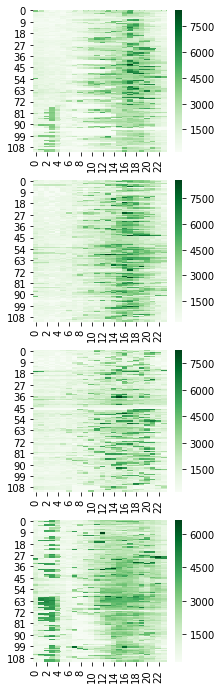

In [109]:
import seaborn as sns
fig, axes = plt.subplots(nrows = 4, figsize=(3, 12))
ax = axes.flatten()
homes = [0, 4, 8, 12]
for i, home_id in enumerate(homes):
    sns.heatmap(test_aggregate[fold_num][home_id], ax=ax[i], cmap='Greens', )
# ax[i*6+1].yaxis.set_ticklabels([])

In [167]:
gt[0]['hvac'].shape

(14, 112, 24)

In [106]:
import seaborn as sns

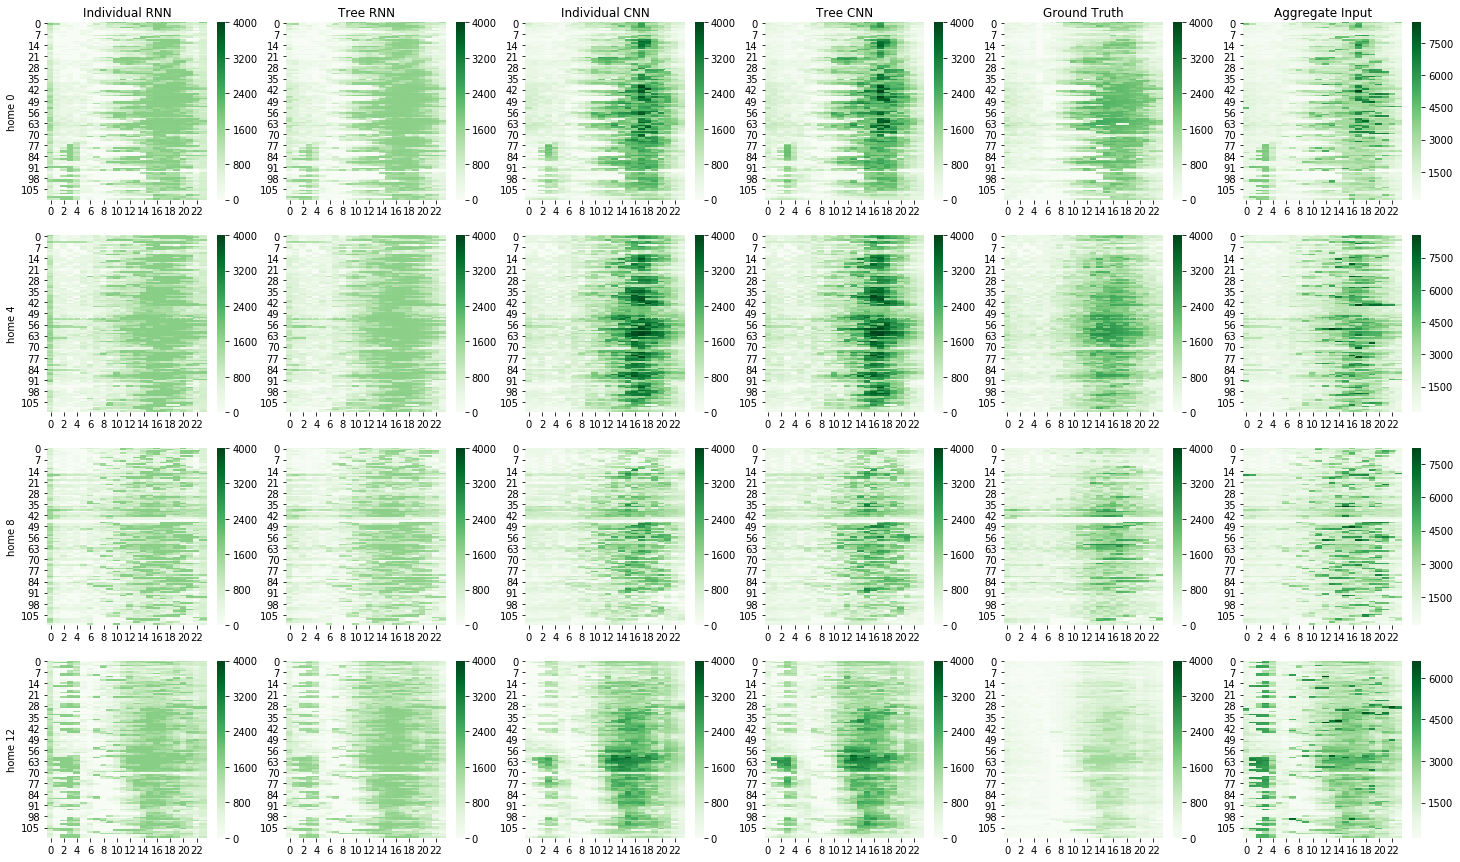

In [108]:
fig, axes = plt.subplots(ncols=6, nrows = 4, figsize=(25, 15))
ax = axes.flatten()
homes = [0, 4, 8, 12]
appliance = 'hvac'
fold_num = 0

for i, home_id in enumerate(homes):
    for idx, method in enumerate(pred.keys()):
        sns.heatmap(pred[method][fold_num][appliance][home_id][0], ax=ax[i*6 + idx], cmap='Greens', vmin=0, vmax=4000)
        ax[idx].set_title(method)
    idx+=1
    sns.heatmap(gt[fold_num][appliance][home_id], ax=ax[i*6 + idx], cmap='Greens', vmin=0, vmax=4000)
    ax[idx].set_title("Ground Truth")
    idx+=1
    sns.heatmap(test_aggregate[fold_num][home_id], ax=ax[i*6+idx], cmap='Greens')
    ax[idx].set_title("Aggregate Input")
for i in range(4):
    ax[i*6].set_ylabel("home {}".format(homes[i]))

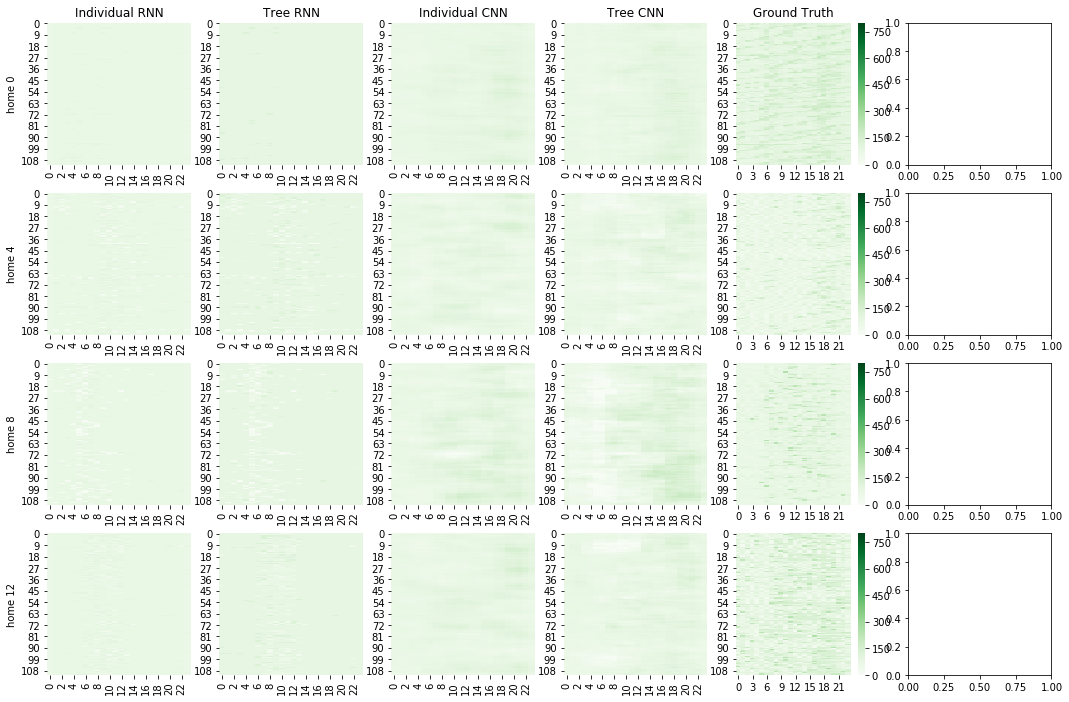

In [488]:
fig, axes = plt.subplots(ncols=6,nrows = 4, figsize=(18, 12))
ax = axes.flatten()
homes = [0, 4, 8, 12]
appliance = 'fridge'

for i, home_id in enumerate(homes):
    for idx, method in enumerate(pred.keys()):
        sns.heatmap(pred[method][appliance][home_id][0], ax=ax[i*6 + idx], cmap='Greens', vmin=0, vmax=800, cbar=False)
        ax[idx].set_title(method)
    idx+=1
    sns.heatmap(gt[appliance][home_id][0], ax=ax[i*6 + idx], cmap='Greens',vmin=0, vmax=800)
    ax[idx].set_title("Ground Truth")
for i in range(4):
    ax[i*6].set_ylabel("home {}".format(homes[i]))

# Raw Data Analysis

In [97]:
tensor = np.load("../2015-5appliances.numpy.npy")
tensor.shape

(68, 6, 112, 24)

In [159]:
appliance = 'mw'
dr_readings = tensor[:, 4]
dr_readings.shape

(68, 112, 24)

In [160]:
avg = {}
use_days = {}
interval = {}
for i in range(68):
    home_readings = dr_readings[i]
    avg[i] = []
    use_days[i] = []
    interval[i] = []
    for day in range(112):
        avg[i].append(dr_readings[i][day].mean())
        if dr_readings[i][day].mean() > 10:
            use_days[i].append(day)
            if len(use_days[i]) > 1:
                interval[i].append(use_days[i][-1] - use_days[i][-2])

(array([  2.76300000e+03,   6.80000000e+01,   1.60000000e+01,
          5.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.,   8.,  15.,  22.,  29.,  36.,  43.,  50.,  57.,  64.,  71.]),
 <a list of 10 Patch objects>)

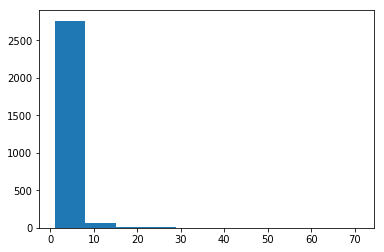

In [195]:
freq = []
for key, value in interval.items():
    freq.extend(value)
plt.hist(freq)

# non-zero predictions for each method

[36259, 745, 303, 160, 95, 40, 20, 6, 2, 2]
[-486.4793701171875, 165.09454345703125, 816.66845703125, 1468.2423706054688, 2119.8162841796875, 2771.3901977539062, 3422.964111328125, 4074.5380249023438, 4726.1119384765625, 5377.685852050781]


Text(0,0.5,'#')

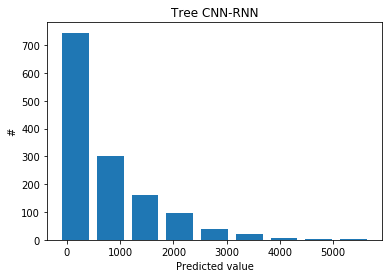

In [269]:
appliance = 'dr'
method = 'Tree CNN-RNN'
H, bins=np.histogram(pred[method][appliance].reshape(1, -1))
print(H.tolist())
print(bins[:-1].tolist())
plt.bar(bins[1:-1],H[1:], width=500)
plt.title(method)
plt.xlabel("Predicted value")
plt.ylabel("#")

In [193]:
for method in pred.keys():
    H, bins=np.histogram(pred[method][appliance].reshape(1, -1))

    print(method, H[0]/H.sum())

Individual RNN 0.0168739370748
Tree RNN 0.996784651361
Individual CNN 0.975021258503
Tree CNN 0.980575042517
Tree CNN-RNN 0.963515093537
